In [1]:
import pandas
from unicore.data import LMDBDataset
import pickle
# progress bar
from tqdm import tqdm


In [2]:
FULL_CSV_PATH = "/scratch/ssd004/datasets/cellxgene/3d_molecule_data/chembl/original_data/chembl_34_molecular_property.csv"
TRAIN_CSV_PATH = "/scratch/ssd004/datasets/cellxgene/3d_molecule_data/chembl/conformation/train.csv"
VALID_CSV_PATH = "/scratch/ssd004/datasets/cellxgene/3d_molecule_data/chembl/conformation/valid.csv"

VALID_LMDB_PATH = "/scratch/ssd004/datasets/cellxgene/3d_molecule_data/cleaned_ligands/valid.lmdb"

# load data
full_data = pandas.read_csv(FULL_CSV_PATH)
print(f"Loaded {len(full_data)} rows from {FULL_CSV_PATH}")

# get all smiles in this lmdb
valid_dataset = LMDBDataset(VALID_LMDB_PATH)
valid_smiles = set([row["smi"] for row in valid_dataset])

# get the overlap between valid and full
overlap = valid_smiles.intersection(set(full_data["smiles"]))
print(f"Overlap: {len(overlap)}")

# save it to a new csv
valid_data = full_data[full_data["smiles"].isin(overlap)]
train_data = full_data[~full_data["smiles"].isin(overlap)]

Loaded 2346505 rows from /scratch/ssd004/datasets/cellxgene/3d_molecule_data/chembl/original_data/chembl_34_molecular_property.csv
Overlap: 9966


In [3]:
train_data["smiles"]

0               Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1            Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2           Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3               Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4             Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1
                                 ...                        
2346500                  CN1C(=O)C(=Cc2ccccc2O)C(=O)N(C)C1=O
2346501         COc1ccc(-c2nc(NCCN3CCOCC3)c3cc(OC)ccc3n2)cc1
2346502    C[C@@H]1[C@@H](C)[C@H](C)O[C@@H](O[C@@H]2[C@@H...
2346503    C[C@@H]1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)n...
2346504                   Nc1cc(-c2ccc(Oc3ccc(Cl)cc3)cc2)cs1
Name: smiles, Length: 2336539, dtype: object

In [4]:
# check if smi is in train_data["smiles"]
smi = "c1coc([C@H](CNc2cncc3nnnn23)N2CCCC2)c1"
print(smi in train_data["smiles"].values)

True


In [5]:
smi2idx_map_train = pickle.load(open("/scratch/ssd004/datasets/cellxgene/3d_molecule_data/weak-supervision/train.pkl", "rb"))
smi2idx_map_valid = pickle.load(open("/scratch/ssd004/datasets/cellxgene/3d_molecule_data/weak-supervision/valid.pkl", "rb"))

In [6]:
ligand_train_data_path = "/scratch/ssd004/datasets/cellxgene/3d_molecule_data/cleaned_ligands/train.lmdb"

ligand_lmdb_data = LMDBDataset(ligand_train_data_path)

In [1]:
# smi_org = train_data["smiles"].values[0]
# smi_org = "C[C@@H]1C(=O)[C@H]2C[C@]1(O)CC1=C2[C@]2(C)CCC[C@@](C)(CO)[C@H]2CC1"
smi_org = "CC1=C(C)C(=O)OC1=O"
smi_org

'CC1=C(C)C(=O)OC1=O'

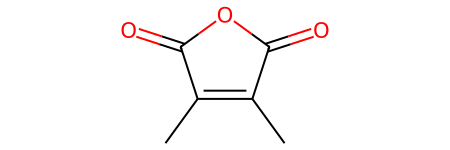

In [2]:
import rdkit
mol = rdkit.Chem.MolFromSmiles(smi_org)
mol

In [3]:
# get smi from mol
smi = rdkit.Chem.MolToSmiles(mol)
smi

'CC1=C(C)C(=O)OC1=O'

In [4]:
smi == smi_org

True

In [5]:
# print the later 10 rows of smi2idx_map_train
for smi, idx in list(smi2idx_map_train.items())[-10:]:
    print(f"{smi}: {idx}")

NameError: name 'smi2idx_map_train' is not defined

In [ ]:
smi in smi2idx_map_train

True

In [ ]:
smi in smi2idx_map_valid

False

In [ ]:
# iterate over the ligand_lmdb_data and check if the smi is in the it
for row in tqdm(ligand_lmdb_data):
    if row["smi"] == smi:
        print(row)
        break

100%|██████████| 13270476/13270476 [12:14<00:00, 18067.96it/s]


In [ ]:
chembl_train_data_path = "/scratch/ssd004/datasets/cellxgene/3d_molecule_data/chembl/conformation/train.lmdb"
chembl_lmdb_data = LMDBDataset(chembl_train_data_path)

# iterate over the ligand_lmdb_data and check if the smi is in the it
for row in tqdm(chembl_lmdb_data):
    entry = row["smi"]
    # remove /n
    entry = entry.replace("\n", "")
    if entry == smi:
        print(row)
        break

100%|██████████| 874343/874343 [01:46<00:00, 8186.36it/s]


In [ ]:
ligand_valid_data_path = "/scratch/ssd004/datasets/cellxgene/3d_molecule_data/cleaned_ligands/valid.lmdb"
ligand_valid_lmdb_data = LMDBDataset(ligand_valid_data_path)
for row in tqdm(ligand_valid_lmdb_data):
    if row["smi"] == smi:
        print(row)
        break


100%|██████████| 98844/98844 [00:05<00:00, 18832.68it/s]
